In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

In [2]:
# ------------------------------
# Load data
# ------------------------------
penguins = sns.load_dataset("penguins").dropna()
penguins["is_adelie"] = (penguins["species"] == "Adelie").astype(int)

X = penguins[["bill_length_mm", "bill_depth_mm",
              "flipper_length_mm", "body_mass_g"]].values
y = penguins["is_adelie"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
#scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#X_train_scaled=X_train
#X_test_scaled=X_test

In [3]:
# ------------------------------
# Logistic Regression
# ------------------------------
#lr = LogisticRegression(max_iter=10000, solver='sag',penalty='l2', C=1.0)
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
prob_lr = lr.predict_proba(X_test_scaled)[:,1]
print("Logistic Regression coefficients:")
print(lr.coef_)
print("Intercept:", lr.intercept_)
print("Test accuracy (logistic regression):", lr.score(X_test_scaled, y_test))

Logistic Regression coefficients:
[[-3.74295062  1.96747912 -0.65240735  0.54141359]]
Intercept: [-0.94495534]
Test accuracy (logistic regression): 0.97


In [4]:
# ------------------------------
# Neural Network = 1-layer LR
# ------------------------------
###tf.random.set_seed(0)

nn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid') ####, kernel_regularizer=regularizers.l2(0.5), bias_regularizer=None)
])

nn.compile(optimizer=tf.keras.optimizers.SGD(0.01, momentum=0.9, nesterov=True),
           loss='binary_crossentropy',
           metrics=['accuracy'])

nn.fit(X_train_scaled, y_train, epochs=100, verbose=1)
prob_nn = nn.predict(X_test_scaled).flatten()

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7124 - loss: 0.6290  
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7468 - loss: 0.5682 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7768 - loss: 0.4991 
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8026 - loss: 0.4385 
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8069 - loss: 0.3902 
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8369 - loss: 0.3524 
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8498 - loss: 0.3213 
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8627 - loss: 0.2952 
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8841 - loss: 0.2744 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8970 - loss: 0.2556 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9056 - loss: 0.2403 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9142 - lo

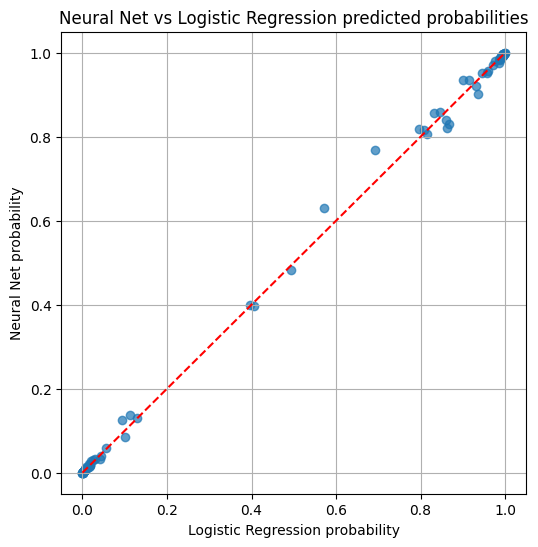

In [5]:
# ------------------------------
# Compare predictions
# ------------------------------
plt.figure(figsize=(6,6))
plt.scatter(prob_lr, prob_nn, alpha=0.7)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("Logistic Regression probability")
plt.ylabel("Neural Net probability")
plt.title("Neural Net vs Logistic Regression predicted probabilities")
plt.grid(True)
plt.show()

In [6]:
# ------------------------------
# Print coefficients side by side
# ------------------------------
print("Logistic Regression coefficients:")
print(lr.coef_)
print("Intercept:", lr.intercept_)

print("\nNeural Network weights:")
w, b = nn.layers[0].get_weights()
print(w.reshape(-1))
print("Bias:", b)

Logistic Regression coefficients:
[[-3.74295062  1.96747912 -0.65240735  0.54141359]]
Intercept: [-0.94495534]

Neural Network weights:
[-3.534325   1.7284899 -0.9745686  0.5602028]
Bias: [-0.9412211]
